In [2]:
import pandas as pd
import os

In [2]:
# Path to the folder containing the CSV files
csv_folder = r"D:\NU\semester_5\data_analysis\project\edited_project"

# Output file
output_file = r"D:\NU\semester_5\data_analysis\project\edited_project\viirs_dataset.csv"

# List of CSV files to merge (all files in the folder)
csv_files = [
    "viirs_rio_1_dataset.csv",
    "viirs_rio_2_dataset.csv",
    "viirs_rio_3_dataset.csv",

    "viirs_sao_1_dataset.csv",
    "viirs_sao_2_dataset.csv",
    "viirs_sao_3_dataset.csv",

    "viirs_bahia_1_dataset.csv",
    "viirs_bahia_2_dataset.csv",
    "viirs_bahia_3_dataset.csv"
]

# Create an empty list to hold DataFrames
dataframes = []

# Loop through the files and read them
for file in csv_files:
    file_path = os.path.join(csv_folder, file)
    df = pd.read_csv(file_path)

    # Extract state, year, and month from the filename
    parts = file.split("_")
    state = parts[1]  # The second part is the state
    month = parts[2]  # The third part is the month

    # Add columns for state, year, and month
    df["state"] = state
    df["year"] = 2020
    df["month"] = month

    dataframes.append(df)

# Concatenate all DataFrames
merged_data = pd.concat(dataframes, ignore_index=True)

# Save the merged dataset to a CSV file
merged_data.to_csv(output_file, index=False)

print(f"Merged dataset saved to {output_file}")

Merged dataset saved to D:\NU\semester_5\data_analysis\project\edited_project\viirs_dataset.csv


In [3]:
df = pd.read_csv(r"D:\NU\semester_5\data_analysis\project\edited_project\viirs_dataset.csv")
print(df.head())

   longitude  latitude  light_intensity state  year  month
0 -44.925000  -20.8375              0.0   rio  2020      1
1 -44.920833  -20.8375              0.0   rio  2020      1
2 -44.916667  -20.8375              0.0   rio  2020      1
3 -44.912500  -20.8375              0.0   rio  2020      1
4 -44.908333  -20.8375              0.0   rio  2020      1


In [4]:
df.duplicated().sum()

0

In [5]:
# Step 1: Drop the 'state' column and check for duplicates
duplicated_mask = df.drop(columns=['state']).duplicated()

# Step 2: Get the duplicated rows
duplicated_rows = df[duplicated_mask]

# Step 3: Output the result
print("Duplicated Rows (Ignoring 'state'):")
print(duplicated_rows)

# Step 4: Count of duplicates
print(f"Number of duplicates: {duplicated_rows.shape[0]}")

Duplicated Rows (Ignoring 'state'):
         longitude   latitude  light_intensity state  year  month
2317172 -44.920833 -20.837500              0.0   sao  2020      1
2317173 -44.916667 -20.837500              0.0   sao  2020      1
2317174 -44.912500 -20.837500              0.0   sao  2020      1
2317175 -44.908333 -20.837500              0.0   sao  2020      1
2317176 -44.904167 -20.837500              0.0   sao  2020      1
...            ...        ...              ...   ...   ...    ...
9326536 -44.258333 -23.441667              0.0   sao  2020      3
9326537 -44.254167 -23.441667              0.0   sao  2020      3
9326538 -44.250000 -23.441667              0.0   sao  2020      3
9326539 -44.245833 -23.441667              0.0   sao  2020      3
9326540 -44.241667 -23.441667              0.0   sao  2020      3

[160363 rows x 6 columns]
Number of duplicates: 160363


In [6]:
# Group and inspect duplicates for further analysis
duplicate_summary = duplicated_rows.groupby(['longitude', 'latitude', 'year', 'month']).size()
print(duplicate_summary)

longitude   latitude    year  month
-44.920833  -22.979167  2020  1        1
            -22.883334  2020  1        1
            -22.454167  2020  1        1
                              2        1
                              3        1
                                      ..
-44.241667  -20.841667  2020  2        1
                              3        1
            -20.837500  2020  1        1
                              2        1
                              3        1
Length: 160363, dtype: int64


In [7]:
# Filter locations with more than one duplicate
locations_with_duplicates = duplicate_summary[duplicate_summary > 1]
print(locations_with_duplicates)

Series([], dtype: int64)


In [9]:
# Check if 'state' differentiates duplicates
unique_states_per_group = duplicated_rows.groupby(['longitude', 'latitude', 'year', 'month'])['state'].nunique()
print(unique_states_per_group[unique_states_per_group > 1])

Series([], Name: state, dtype: int64)


In [10]:
# Check duplicates within each state
duplicates_per_state = df.groupby('state').apply(lambda x: x.duplicated(subset=['longitude', 'latitude', 'year', 'month']).sum())
print("Number of duplicates per state:")
print(duplicates_per_state)

Number of duplicates per state:
state
bahia    0
rio      0
sao      0
dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_10656\2699302351.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicates_per_state = df.groupby('state').apply(lambda x: x.duplicated(subset=['longitude', 'latitude', 'year', 'month']).sum())


In [11]:
# Find rows with cross-state duplicates
cross_state_duplicates = df[df.duplicated(subset=['longitude', 'latitude', 'year', 'month'], keep=False)]
print("Cross-state duplicates:")
print(cross_state_duplicates)

Cross-state duplicates:
         longitude   latitude  light_intensity state  year  month
1       -44.920833 -20.837500              0.0   rio  2020      1
2       -44.916667 -20.837500              0.0   rio  2020      1
3       -44.912500 -20.837500              0.0   rio  2020      1
4       -44.908333 -20.837500              0.0   rio  2020      1
5       -44.904167 -20.837500              0.0   rio  2020      1
...            ...        ...              ...   ...   ...    ...
9326536 -44.258333 -23.441667              0.0   sao  2020      3
9326537 -44.254167 -23.441667              0.0   sao  2020      3
9326538 -44.250000 -23.441667              0.0   sao  2020      3
9326539 -44.245833 -23.441667              0.0   sao  2020      3
9326540 -44.241667 -23.441667              0.0   sao  2020      3

[477012 rows x 6 columns]


In [12]:
# Inspect distinct states for each duplicate group
unique_states_per_group = cross_state_duplicates.groupby(['longitude', 'latitude', 'year', 'month'])['state'].nunique()
print(unique_states_per_group[unique_states_per_group > 1])

longitude   latitude    year  month
-44.920833  -23.441667  2020  1        2
                              2        2
                              3        2
            -23.437500  2020  1        2
                              2        2
                                      ..
-44.241667  -20.841667  2020  2        2
                              3        2
            -20.837500  2020  1        2
                              2        2
                              3        2
Name: state, Length: 238506, dtype: int64


In [13]:
# Combine states for each duplicate group
aggregated_data = cross_state_duplicates.groupby(['longitude', 'latitude', 'year', 'month'], as_index=False).agg({
    'light_intensity': 'sum',  # Optionally sum light intensity
    'state': ', '.join  # Combine state values into a single string
})
print(f"Aggregated dataset shape: {aggregated_data.shape}")


Aggregated dataset shape: (238506, 6)


In [14]:
print(aggregated_data.head())

   longitude   latitude  year  month  light_intensity     state
0 -44.920833 -23.441667  2020      1             0.06  rio, sao
1 -44.920833 -23.441667  2020      2             0.29  rio, sao
2 -44.920833 -23.441667  2020      3             0.23  rio, sao
3 -44.920833 -23.437500  2020      1             0.12  rio, sao
4 -44.920833 -23.437500  2020      2             0.32  rio, sao


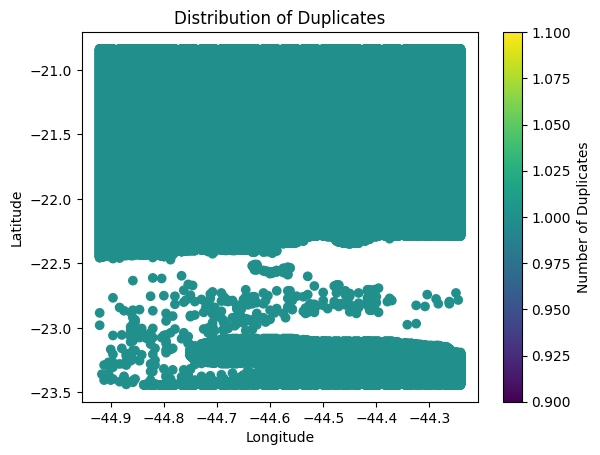

In [8]:
import matplotlib.pyplot as plt

# Plot the number of duplicates by longitude and latitude
duplicate_counts = duplicate_summary.reset_index(name='count')
plt.scatter(duplicate_counts['longitude'], duplicate_counts['latitude'], c=duplicate_counts['count'], cmap='viridis')
plt.colorbar(label='Number of Duplicates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Duplicates')
plt.show()


In [15]:
# Filter duplicate groups with count > 1
high_density = duplicate_counts[duplicate_counts['count'] > 1]
print(high_density)


Empty DataFrame
Columns: [longitude, latitude, year, month, count]
Index: []
